<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/tp2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7-Execute o procedimento de clusterização hierárquica sobre o dataset make_swiss_roll. Apresente os resultados.
comeco do dataset[5] =
   Dimensao_1  Dimensao_2  Dimensao_3
0   -8.767060    9.512693   -4.319996
1    4.997168   17.567867  -10.247606
2   -5.862167    4.699786   -8.656525
3   -8.959301   10.393520   -3.976970
4   -6.568264   19.492800    5.681714
final do dataset [5] =
      Dimensao_1  Dimensao_2  Dimensao_3
1495    1.403295   19.778775   -4.740748
1496    6.402687   11.533458    1.601074
1497    4.998147    6.854342   -2.840404
1498    1.993099   17.159953   -4.729221
1499    5.692904   14.564442    3.740829
informacoes sobre o dataset =
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dimensao_1  1500 non-null   float64
 1   Dimensao_2  1500 non-null   float64
 2   Dimensao_3  1500 non-null   float64
dtypes: float64(3)
memory u

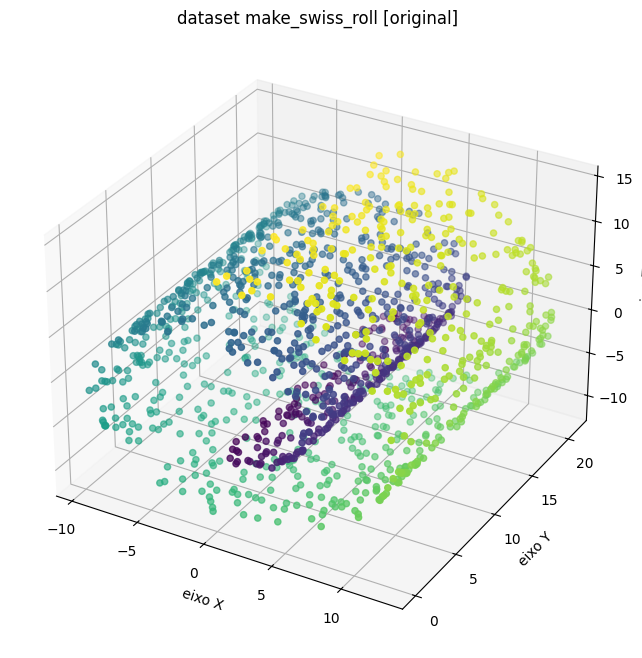

labels dos clusters encontrados: [0 1 2 3]


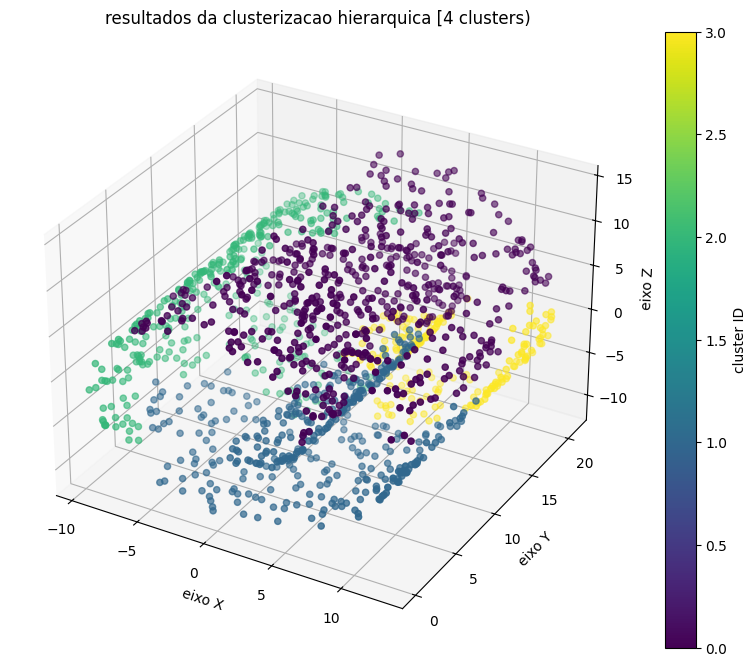

numero de clusters: 3
indice de silhueta: 0.2747
labels dos clusters encontrados: [0 1 2]


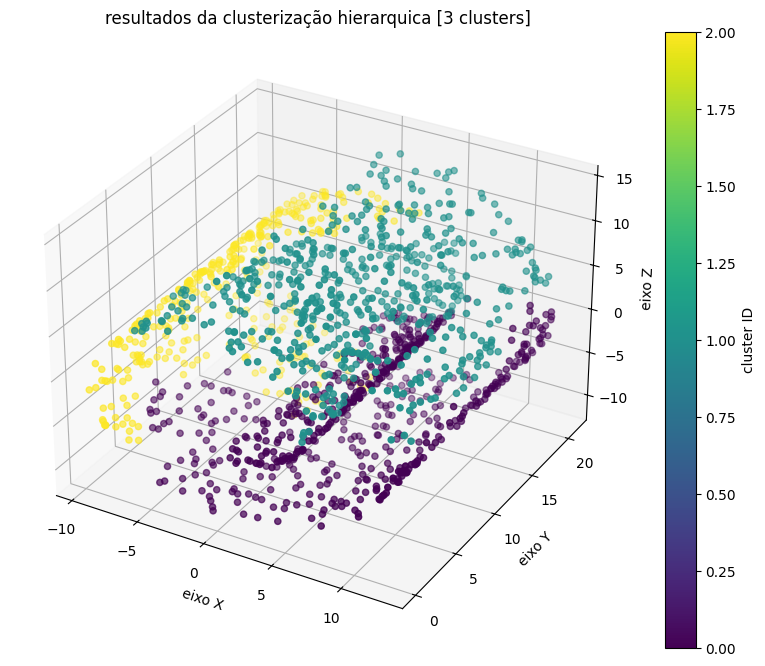

numero de clusters: 4
indice de silhueta: 0.2554
labels dos clusters encontrados: [0 1 2 3]


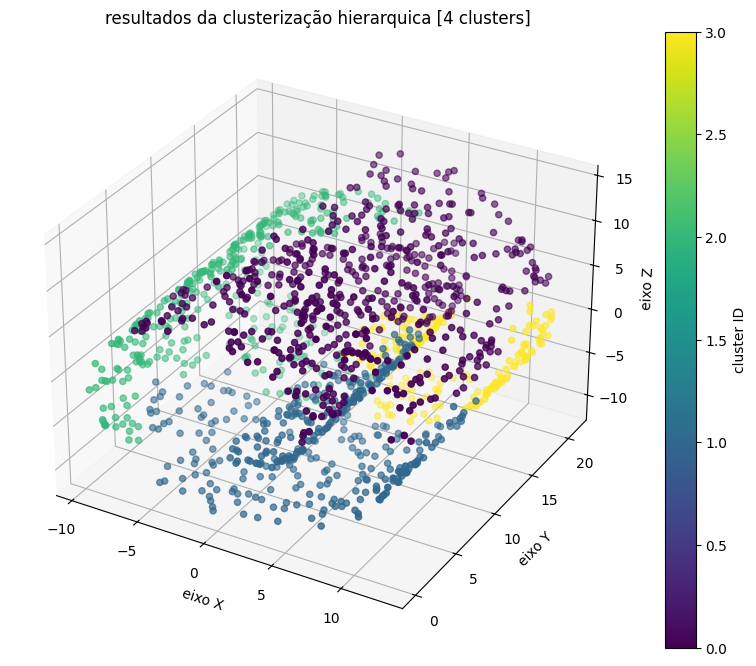

numero de clusters: 5
indice de silhueta: 0.2361
labels dos clusters encontrados: [0 1 2 3 4]


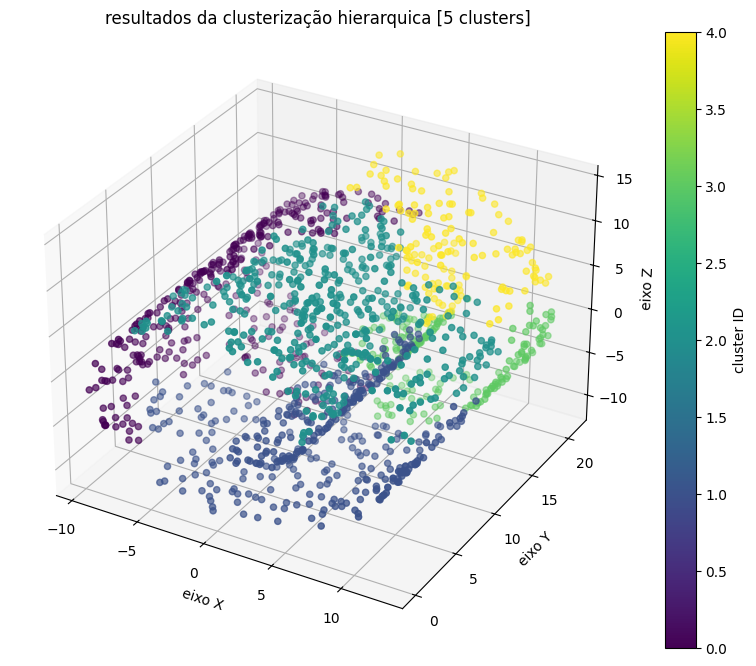

melhor numero de clusters [baseado no indice de silhueta]: 3
indice de silhueta correspondente: 0.2747


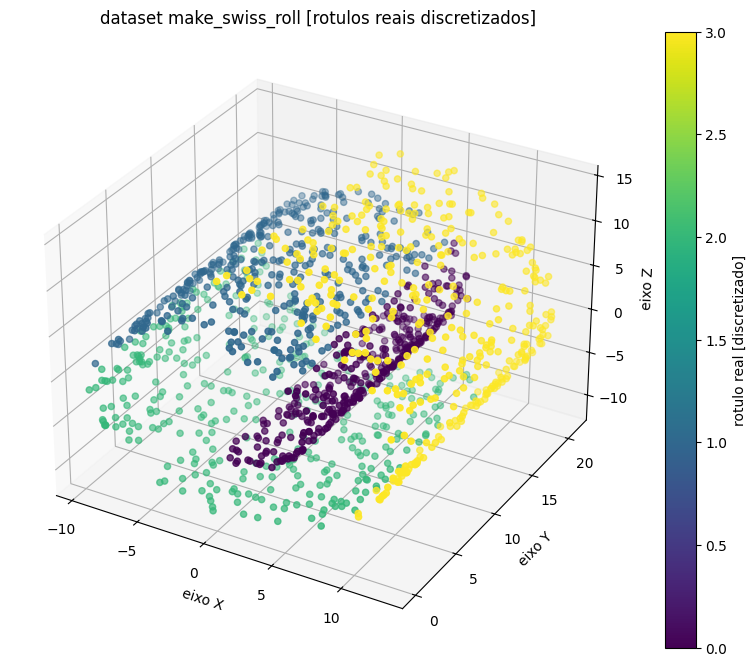

8- Construa um dendrograma para o modelo obtido na questão anterior. Apresente os resultados.
melhor numero de clusters [baseado no índice de silhueta]: 3
indice de silhueta correspondente: 0.2747


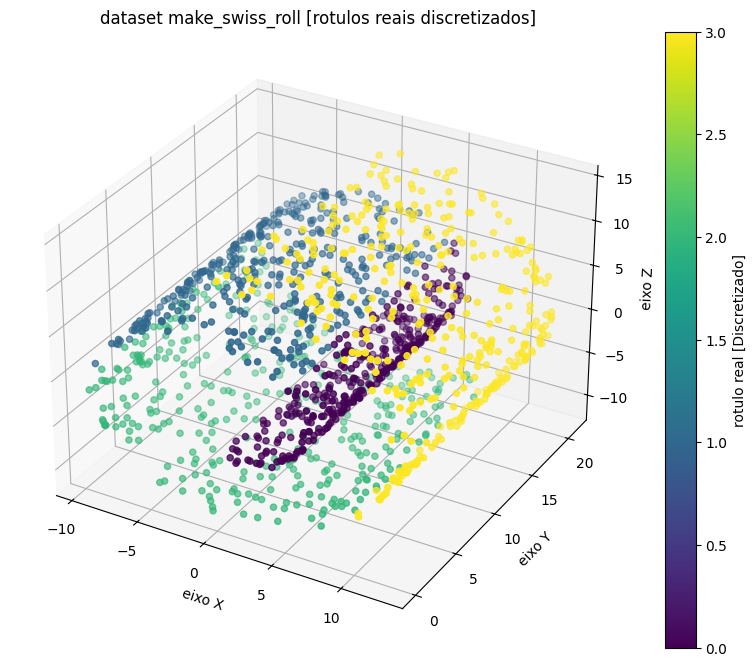

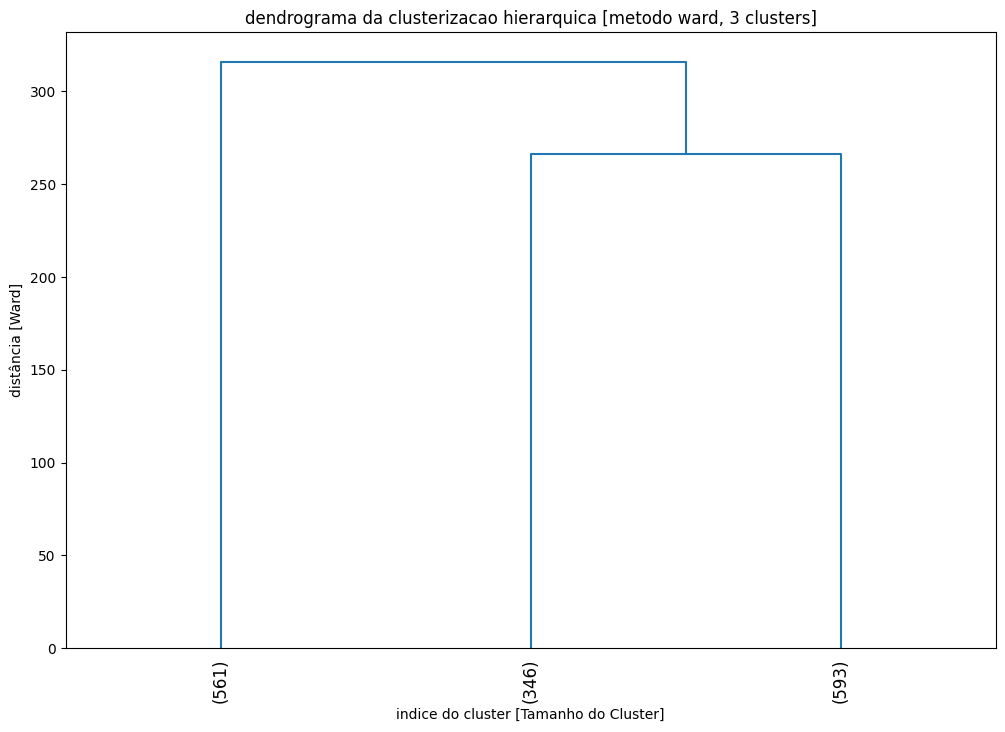

9-Associe o dendrograma da questão anterior a um mapa de calor. Apresente os resultados.
melhor numero de clusters [baseado no indice de silhueta]: 3
indice de silhueta correspondente: 0.2747


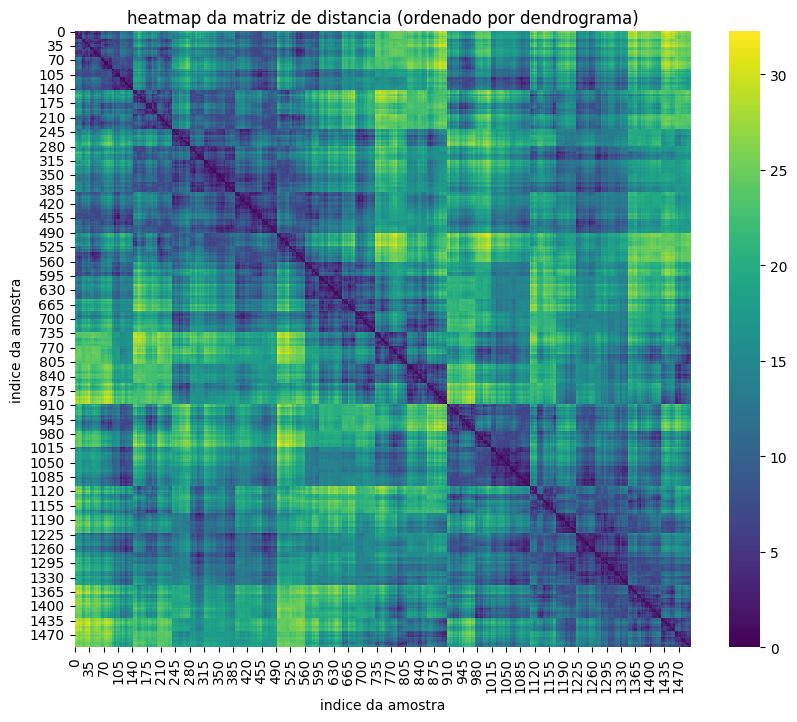

In [1]:
print("7-Execute o procedimento de clusterização hierárquica sobre o dataset make_swiss_roll. Apresente os resultados.")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import seaborn as sns
from sklearn.metrics import silhouette_score
#gerar o dataset
#os dados do make_swiss_roll gera dois arrays numpy, X [os pontos] e t [o rótulo real]
X, t = make_swiss_roll(n_samples=1500, noise=0.05, random_state=0)

#analise exploratoria com pandas
#converte o array numpy X em um dataframe do pandas para analise exploratoria
df = pd.DataFrame(X, columns=['Dimensao_1', 'Dimensao_2', 'Dimensao_3'])

print("comeco do dataset[5] =")
print(df.head())

print("final do dataset [5] =")
print(df.tail())

print("informacoes sobre o dataset =")
df.info()

print(f"o dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas")
print("nomes das colunas:", df.columns.tolist())

print("descritivas das colunas numericas:")
print(df.describe())

print("contagem de valores nulos por coluna:")
print(df.isnull().sum())

#procedimento de clusterizacao hierarquica

#visualizacao 3D do dataset original
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.viridis)
ax.set_title("dataset make_swiss_roll [original]")
ax.set_xlabel("eixo X")
ax.set_ylabel("eixo Y")
ax.set_zlabel("eixo Z")
plt.show()

#definindo o numero de clusters [4]
n_clusters = 4

#criacao do modelo de clusterizacao hierarquica
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

#execucao da clusterizacao
labels = hierarchical_cluster.fit_predict(X)

#as labels geradas pelo algoritmo
print("labels dos clusters encontrados:", np.unique(labels))

#visualizacao 3D dos resultados da clusterizacao
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
ax.set_title(f"resultados da clusterizacao hierarquica [{n_clusters} clusters)")
ax.set_xlabel("eixo X")
ax.set_ylabel("eixo Y")
ax.set_zlabel("eixo Z")

#adiciona uma barra de cores para entender as labels dos clusters
plt.colorbar(scatter, ax=ax, label='cluster ID')
plt.show()

###################### EXTRA ###########################


#exploração de diferentes números de clusters
n_clusters_range = [3, 4, 5]  #testando 3, 4 e 5 clusters
silhouette_scores = []  #lista para armazenar os índices de silhueta

for n_clusters in n_clusters_range:
    #criacao do modelo de clusterização hierarquica
    hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

    #execução da clusterizacao
    labels = hierarchical_cluster.fit_predict(X)

    #calculo do indice de silhueta
    #esta linha agora deve funcionar corretamente, pois a função está importada
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"numero de clusters: {n_clusters}")
    print(f"indice de silhueta: {silhouette_avg:.4f}")
    print("labels dos clusters encontrados:", np.unique(labels))

    #visualização 3D dos resultados da clusterização
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
    ax.set_title(f"resultados da clusterização hierarquica [{n_clusters} clusters]")
    ax.set_xlabel("eixo X")
    ax.set_ylabel("eixo Y")
    ax.set_zlabel("eixo Z")
    plt.colorbar(scatter, ax=ax, label='cluster ID')
    plt.show()


#exibir o melhor numero de clusters com base no indice de silhueta
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f"melhor numero de clusters [baseado no indice de silhueta]: {best_n_clusters}")
print(f"indice de silhueta correspondente: {max(silhouette_scores):.4f}")

#comparacao com rotulos reais [t]
#como t eh continuo, discretizamos em 4 bins para comparacao visual
t_discretized = pd.qcut(t, q=4, labels=False)  #divide t em 4 categorias
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t_discretized, cmap='viridis')
ax.set_title("dataset make_swiss_roll [rotulos reais discretizados]")
ax.set_xlabel("eixo X")
ax.set_ylabel("eixo Y")
ax.set_zlabel("eixo Z")
plt.colorbar(scatter, ax=ax, label='rotulo real [discretizado]')
plt.show()

print("8- Construa um dendrograma para o modelo obtido na questão anterior. Apresente os resultados.")

#exibir o melhor numero de clusters com base no indice de silhueta
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f"melhor numero de clusters [baseado no índice de silhueta]: {best_n_clusters}")
print(f"indice de silhueta correspondente: {max(silhouette_scores):.4f}")

#comparacao com rotulos reais [t]#divide t em 4 categorias
t_discretized = pd.qcut(t, q=4, labels=False)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t_discretized, cmap='viridis')
ax.set_title("dataset make_swiss_roll [rotulos reais discretizados]")
ax.set_xlabel("eixo X")
ax.set_ylabel("eixo Y")
ax.set_zlabel("eixo Z")
plt.colorbar(scatter, ax=ax, label='rotulo real [Discretizado]')
plt.show()

#construcao do dendrograma para o modelo com o melhor número de clusters
#calcula a matriz de ligacao usando o metodo 'ward'
Z = linkage(X, method='ward')

#criacao do dendrograma
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=best_n_clusters, show_leaf_counts=True, leaf_rotation=90)
plt.title(f"dendrograma da clusterizacao hierarquica [metodo ward, {best_n_clusters} clusters]")
plt.xlabel("indice do cluster [Tamanho do Cluster]")
plt.ylabel("distância [Ward]")
plt.show()


##################################################################################################################################################################################################################

print("9-Associe o dendrograma da questão anterior a um mapa de calor. Apresente os resultados.")




#dataset
X, t = make_swiss_roll(n_samples=1500, noise=0.05, random_state=0)

#determinar clusers
n_clusters_range = [3, 4, 5]
silhouette_scores = []
for n_clusters in n_clusters_range:
    hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = hierarchical_cluster.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f"melhor numero de clusters [baseado no indice de silhueta]: {best_n_clusters}")
print(f"indice de silhueta correspondente: {max(silhouette_scores):.4f}")

#construção do dendrograma e heatmap

#1º:calcular a matriz de ligacao completa para o dendrograma
Z = linkage(X, method='ward')

#2º:gerar o dendrograma para obter a ordem das folhas [sem plotar]
dendro = dendrogram(Z, no_plot=True)
order = dendro['leaves']

#3º:calcular a matriz de distancia completa
dist_matrix = pdist(X, metric='euclidean')
dist_matrix_square = np.zeros((len(X), len(X)))
dist_matrix_square[np.triu_indices(len(X), k=1)] = dist_matrix
#tornar a matriz simetrica
dist_matrix_square += dist_matrix_square.T

#4º:reordenar a matriz de distancia com base na ordem do dendrograma
dist_matrix_ordered = dist_matrix_square[order, :][:, order]

#5°:plotar o heatmap da matriz de distancia reordenada
plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix_ordered, cmap='viridis', square=True)
plt.title(f"heatmap da matriz de distancia (ordenado por dendrograma)")
plt.xlabel("indice da amostra")
plt.ylabel("indice da amostra")
plt.show()
